In [1]:
import plotly.express as px
import pandas as pd
import os

fp = os.getcwd().replace(r"\plotly", "") + r"\data"

# necessary for github
import plotly.io as pio
pio.renderers.default = "svg"

# Dataset 1
titanic = pd.read_csv(fp + r"\titanic_train.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
# Dataset 2
gdp = pd.read_csv(fp + r"\gdp.csv")
gdp.head(3)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10


# Basics

In [5]:
# Creating a generic Function, so the images always have the same size
def image_size(fig):
    fig.update_layout(
        autosize = False,
        width = 800,
        height = 400)

### Line Plot

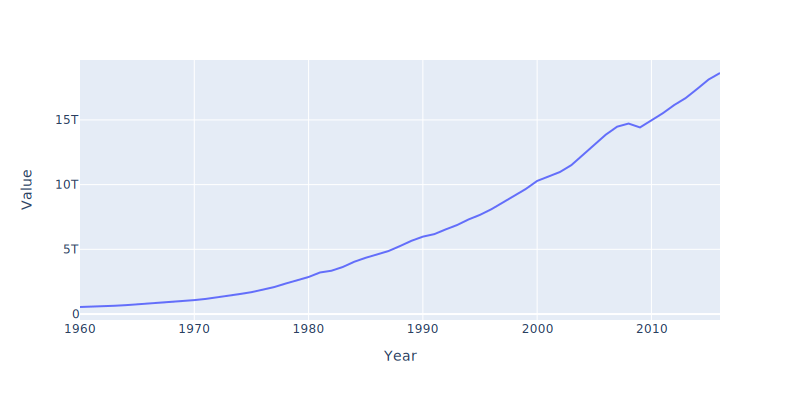

In [13]:
# Defining Data
data = gdp.loc[gdp["Country Name"] == "United States"]

# Creating Plot
fig = px.line(data, x = "Year", y = "Value")


image_size(fig)
fig.show()

### Bar Plot

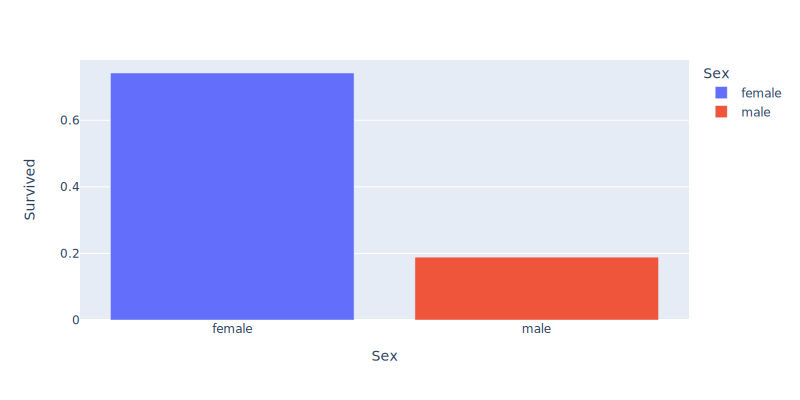

In [14]:
# Defining Data
data = titanic.pivot_table(
        values = "Survived",
        index = "Sex",
        aggfunc = "mean").reset_index()

# Creating plot
fig = px.bar(data, x = "Sex", y = "Survived", color = "Sex")

image_size(fig)
fig.show()

### Scatter Plot

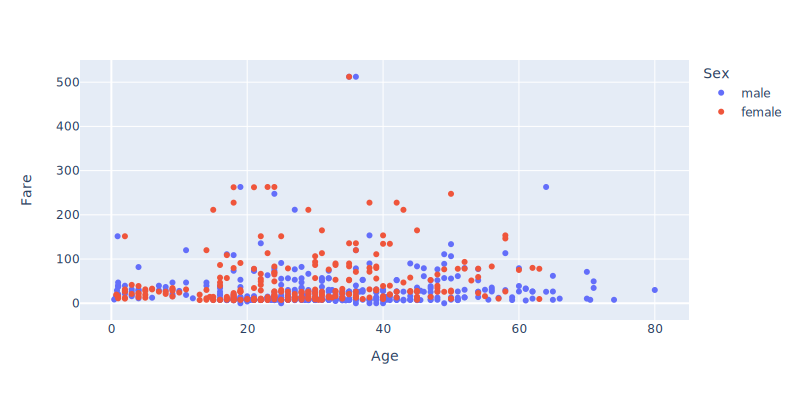

In [15]:
fig = px.scatter(titanic, x = "Age", y = "Fare", color="Sex")

image_size(fig)
fig.show()

### Pie Chart

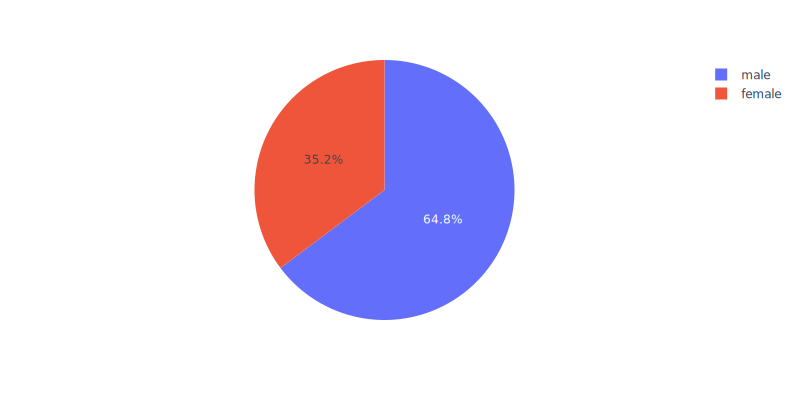

In [16]:
fig = px.pie(titanic, "Sex")

image_size(fig)
fig.show()

# Advanced

### Boxplot

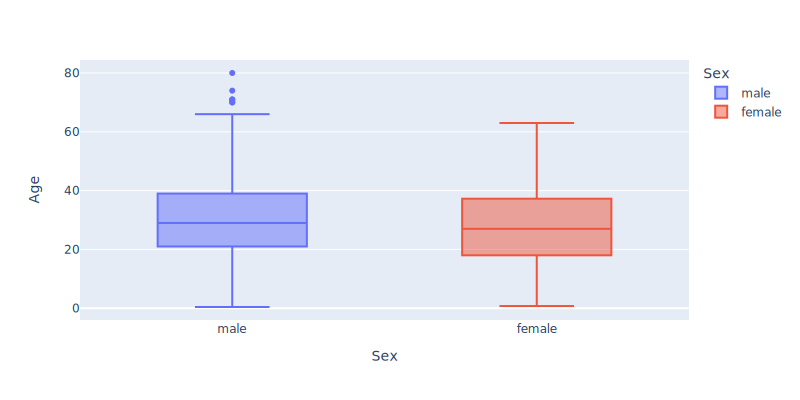

In [10]:
fig = px.box(titanic, y = "Age", x = "Sex", color = "Sex")

image_size(fig)
fig.show()

### Heatmap

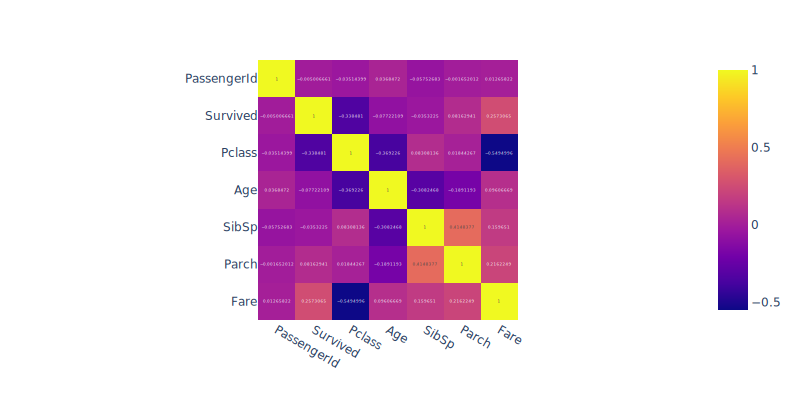

In [12]:
data = titanic.corr()

fig = px.imshow(data, text_auto = True)

image_size(fig)
fig.show()

### Scatter Matrix

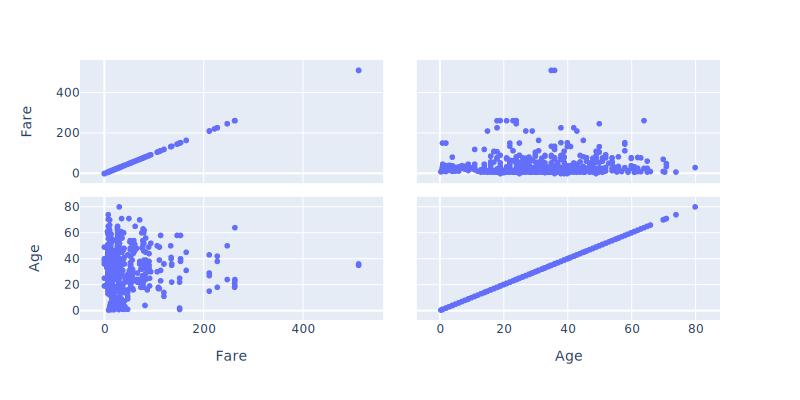

In [22]:
data = titanic[["Fare", "Age"]]

fig = px.scatter_matrix(data)

image_size(fig)
fig.show()

# Styling (WIP!)

In [ ]:
# Editing Layout
fig.update_layout(
    title = "Plot Title",
    
    xaxis_dtick = 5,               # we can either use xaxis_method or use a dict like xaxis = dict(dtick = 5)
)


# Editing single Traces (aka Bars)
fig.update_traces(width = 0.3)

# Editing Layout
fig.update_layout(
    yaxis = dict(
        range = [0, 1]
    )
)
